In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
from numpy import amin, amax, ravel
import numpy.ma as ma

def get_eg_matrix(filename):
    A_set = set()
    B1_set = set()
    B2_set = set()
    X_set = set()
    value_eg = {}

    import re
    with open(filename,'r') as f:
        for line in f:
            compound = line.split()[0]
            if compound != 'None':
                eg = line.split()[1]  ##change here for 1->tolerance or 2->octahedron
                value_eg[compound] = eg
                A_set.add(re.split('1|2|6', compound)[0])
                B1_set.add(re.split('1|2|6', compound)[1])
                B2_set.add(re.split('1|2|6', compound)[2])
                X_set.add(re.split('1|2|6', compound)[3])  
    print(A_set)
    print(B1_set)
    print(B2_set)
    print(X_set)
    print(value_eg)
    
    B1_list = ['Cu','Ag','Au','In','Tl']
    B2_list = ['Sc', 'Y', 'Al','Ga','In','Tl','As','Sb','Bi']

    import numpy as np
    eg = np.zeros( (len(B1_list), len(B2_list)) )
    number = 0
    for a in range(len(B1_list)):
        for b in range(len(B2_list)):
            compound = 'Cs'+'2'+B1_list[a]+'1'+B2_list[b]+'1'+'Cl'+'6'
            if compound in value_eg:
                eg[a][b] = value_eg[compound]
                number +=1
                print(compound, value_eg[compound])
            else:
                eg[a][b] = 1000
    return eg

In [14]:
filename_eg = '/Users/yao/Google Drive/data/2116/data/Eg_result_SOC'
eg = get_eg_matrix(filename_eg)

import numpy.ma as ma
masked_eg = ma.masked_where(eg==1000, eg)


{'K', 'Rb', 'Cs'}
{'In', 'Cu', 'Au', 'Ag', 'Tl'}
{'As', 'Y', 'In', 'Al', 'Tl', 'Ga', 'Sc', 'Bi', 'Sb'}
{'Cl', 'Br', 'I'}
{'Cs2Tl1Bi1I6': '0.3262', 'Cs2Ag1Sc1Cl6': '3.2877', 'Cs2Tl1In1I6': '0.7949', 'Cs2Tl1Ga1Cl6': '2.4169', 'Cs2In1Sc1Cl6': '2.7324', 'Cs2Ag1In1Cl6': '1.0749', 'Cs2Au1Sc1I6': '0.8293', 'Cs2In1Sb1Br6': '0.0739', 'Cs2In1Tl1I6': '0.7916', 'Cs2Ag1Ga1Cl6': '1.0008', 'Cs2Cu1Bi1Br6': '0.5888', 'Cs2Tl1Al1Cl6': '3.6649', 'Cs2Ag1Tl1Cl6': '0', 'Rb2In1In1Br6': '0.6834', 'Cs2Tl1Tl1Br6': '0.408', 'Cs2In1Ga1I6': '0.2638', 'Cs2Tl1As1I6': '0.4953', 'Cs2Tl1In1Cl6': '2.4576', 'Rb2Ag1Sb1I6': '0.3378', 'Cs2Cu1Y1Cl6': '2.3786', 'Rb2Ag1In1Br6': '0.208', 'Cs2Tl1Tl1Cl6': '1.0455', 'Cs2Au1Al1Cl6': '0.4189', 'Rb2Cu1Bi1Br6': '0.5819', 'Cs2Cu1Sc1Cl6': '1.8605', 'Rb2Au1Sb1Cl6': '0.1653', 'Cs2In1Ga1Cl6': '1.7992', 'Cs2Ag1Al1Cl6': '2.2332', 'Cs2Tl1Sb1Br6': '0.6862', 'Cs2In1Al1Cl6': '2.9689', 'Cs2Tl1As1Cl6': '1.2511', 'Rb2Au1Sc1I6': '0.855', 'Cs2Ag1Bi1Cl6': '1.6277', 'Rb2Tl1As1I6': '0.4095', 'Cs2Tl1Sb1I6

posy=0, B1_list=['Cu', 'Ag', 'Au']
posx=0, B2_list=['Sc', 'Y']
[[1.8605 2.3786]
 [3.2877 3.675]
 [1.6891 1.8508]]
posy=0, B1_list=['Cu', 'Ag', 'Au']
posx=2, B2_list=['Al', 'Ga', 'In', 'Tl']
[[-- -- 0.0 0.0]
 [2.2332 1.0008 1.0749 0.0]
 [0.4189 0.0 0.0 0.0]]
posy=0, B1_list=['Cu', 'Ag', 'Au']
posx=6, B2_list=['As', 'Sb', 'Bi']
[[-- 0.6564 0.8221]
 [1.3025 1.3676 1.6277]
 [0.0967 0.1938 0.4838]]
posy=3, B1_list=['In', 'Tl']
posx=0, B2_list=['Sc', 'Y']
[[2.7324 3.3707]
 [3.4695 3.9896]]
posy=3, B1_list=['In', 'Tl']
posx=2, B2_list=['Al', 'Ga', 'In', 'Tl']
[[2.9689 1.7992 1.5929 2.4674]
 [3.6649 2.4169 2.4576 1.0455]]
posy=3, B1_list=['In', 'Tl']
posx=6, B2_list=['As', 'Sb', 'Bi']
[[0.6008 0.528 0.4828]
 [1.2511 1.1039 1.1572]]


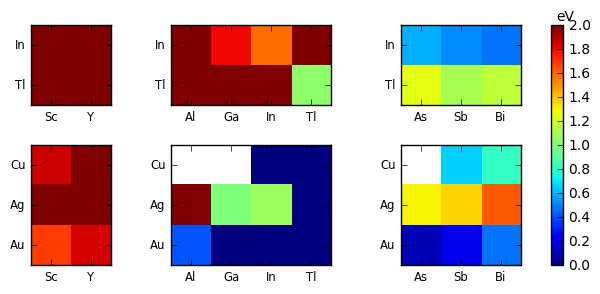

In [15]:
B1_list = [['Cu','Ag','Au'],['In','Tl']]
B2_list = [['Sc', 'Y'], ['Al','Ga','In','Tl'],['As','Sb','Bi']]

fig = figure(figsize=(6,4))
#cmap = cm.cool
ax = []
images = []
vmin = 1e40
vmax = -1e40
cax = fig.add_axes([0.9, 0, 0.02, 0.6])

pos_matrix = [[0, 3],[0, 2, 6]]
wh_matrix = [[3, 2],[2, 4, 3]]
for i in [0, 1]:
    for j in [0, 1, 2]:     
        h = 0.1*wh_matrix[0][i]
        w = 0.1*wh_matrix[1][j]
        posy = 0.1*pos_matrix[0][i] + 0.1*i
        posx = 0.1*pos_matrix[1][j] 
        pos = [posx,posy,w,h]
        posyy = pos_matrix[0][i]
        posxx = pos_matrix[1][j]
        dd = ravel(masked_eg[posyy:posyy+len(B1_list[i]), posxx:posxx+len(B2_list[j])])


        a = fig.add_axes(pos)
        
        plt.yticks(np.arange(len(B1_list[i])), B1_list[i], size='small')
        plt.xticks(np.arange(len(B2_list[j])), B2_list[j], size='small')
        print('posy={}, B1_list={}'.format(posyy, B1_list[i]))
        print('posx={}, B2_list={}'.format(posxx, B2_list[j]))
        print(masked_eg[posyy:posyy+len(B1_list[i]), posxx:posxx+len(B2_list[j])])
        vmin = min(vmin, amin(dd))
        vmax = max(vmax, amax(dd))
        images.append(a.imshow(masked_eg[posyy:posyy+len(B1_list[i]), posxx:posxx+len(B2_list[j])],\
                               interpolation = 'nearest',aspect=1))

        ax.append(a)
    
class ImageFollower:
    'update image in response to changes in clim or cmap on another image'
    def __init__(self, follower):
        self.follower = follower
    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())
norm = colors.Normalize(vmin=0, vmax=2)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))
fig.colorbar(images[0], cax)
axes(ax[0])     # Return the current axes to the first one,
sci(images[0])  # because the current image must be in current axes.

#rect = fig.patch
#rect.set_facecolor('white')

cax.text(0.4, 1.02, "eV",size=10,transform=cax.transAxes)
#ax[0].text(-0.16, 1.1, "a", size=13,transform=ax[0].transAxes)
#plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/Eg_trend.pdf', dpi=300, bbox_inches="tight")
plt.show()